In [168]:
import pandas as pd
import numpy as np
import pprint
from sklearn.preprocessing import OrdinalEncoder
eps = np.finfo(float).eps
print(eps)

2.220446049250313e-16


In [169]:
data = pd.read_csv("lab01_dataset_1.csv")
data.head()

,Mood,Effort,Score,Output
0,Happy,Low,35,Yes
1,Happy,Medium,91,No
2,Happy,High,52,No
3,Neutral,Low,83,No
4,Neutral,Medium,48,No


In [170]:
data.tail()

,Mood,Effort,Score,Output
14,Neutral,High,50,No
15,Sad,Low,69,No
16,Sad,Medium,70,Yes
17,Sad,High,95,No
18,Sad,Low,80,Yes


In [171]:
print(data.columns)
data.shape

Index(['Mood', 'Effort', 'Score', 'Output'], dtype='object')


(19, 4)

In [172]:
data.dtypes

Mood      object
Effort    object
Score      int64
Output    object
dtype: object

In [173]:
# sort the data by score
def sortDataFrameByScore(data):
    data = data.sort_values(by='Score', ignore_index=True)
    data.head()
    return data

In [174]:
data = sortDataFrameByScore(data)
data

,Mood,Effort,Score,Output
0,Happy,Low,35,Yes
1,Happy,High,39,Yes
2,Sad,Low,40,Yes
3,Happy,Low,44,Yes
4,Neutral,Medium,48,No
5,Neutral,High,50,No
6,Happy,High,52,No
7,Neutral,High,61,No
8,Happy,Low,66,No
9,Sad,Low,69,No


In [175]:
def splitPoint(data):
    attributeDataFrame = pd.DataFrame({ 'Score' : data['Score'], 'Output' : data['Output']})
    attributeDataFrame.reindex(np.arange(len(attributeDataFrame['Score'].index)))

    outputvalue = attributeDataFrame['Output'][0]

    splitPointDict = {}

    for i in range(1, len(attributeDataFrame['Score'])):
        if(attributeDataFrame['Output'][i] != outputvalue):
            mean = (attributeDataFrame['Score'][i-1] + attributeDataFrame['Score'][i])/2
            splitPointDict[i-1] = mean
            outputvalue = attributeDataFrame['Output'][i]
        
    pprint.pprint(splitPointDict)
    return attributeDataFrame, splitPointDict
attributeDataFrame, splitPoint = splitPoint(data)
  
# array = list()
# array[0:4] = ['Low_Score', 'Low_Score', 'Low_Score', 'Low_Score']
# array[4:10] = ['Mild_Score', 'Mild_Score', 'Mild_Score', 'Mild_Score', 'Mild_Score', 'Mild_Score']
# array[10:14] = ['High_Score', 'High_Score', 'High_Score', 'High_Score']
# array[14:19] = ['Ultra_Score', 'Ultra_Score', 'Ultra_Score', 'Ultra_Score', 'Ultra_Score']

# data.insert(3, "Score_Info", array, True)
# data

{3: 46.0, 9: 69.5, 13: 81.5}


In [176]:
for i in splitPoint:
    split = splitPoint[i]
    print(splitPoint[i])
    ltYes = 0
    ltNo = 0
    gtYes = 0
    gtNo = 0

    for j in range(0, len(attributeDataFrame['Score'])):
        if attributeDataFrame['Score'][j] < split and attributeDataFrame['Output'][j] == 'Yes':
            ltYes+=1
        if attributeDataFrame['Score'][j] < split and attributeDataFrame['Output'][j] == 'No':
            ltNo+=1

        if attributeDataFrame['Score'][j] >= split and attributeDataFrame['Output'][j] == 'Yes':
            gtYes+=1
        if attributeDataFrame['Score'][j] >= split and attributeDataFrame['Output'][j] == 'No':
            gtNo+=1

    print(ltYes , " | " , ltNo  , " | " , gtYes , " | " , gtNo)

46.0
4  |  0  |  4  |  11
69.5
4  |  6  |  4  |  5
81.5
8  |  6  |  0  |  5


In [177]:
columnsList = {}

for i in splitPoint:
    split = splitPoint[i]
    # "Score_" + str(split)
    scoreList=[]
    for j in range(0, len(attributeDataFrame['Score'])):
        if attributeDataFrame['Score'][j] < split:
            scoreList.append(1) # ("Score_" + str(split) + "True")
        else: 
            scoreList.append(0) # ("Score_" + str(split) + "False")

    columnsList["Score_" + str(split)] = scoreList

pprint.pprint(columnsList)

{'Score_46.0': [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Score_69.5': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Score_81.5': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]}


In [178]:
data['Score_81.5'] = columnsList['Score_81.5']
data['Score_46.0'] = columnsList['Score_46.0']
data['Score_69.5'] = columnsList['Score_69.5']

In [179]:
# feature Score is dropped
data = pd.DataFrame({
    'Mood' : data['Mood'], 
    'Effort' : data['Effort'], 
    'Score_46.0' : data['Score_46.0'], 
    'Score_69.5' : data['Score_69.5'], 
    'Score_81.5' : data['Score_81.5'],
    'Output' : data['Output']
})

data.head()

,Mood,Effort,Score_46.0,Score_69.5,Score_81.5,Output
0,Happy,Low,1,1,1,Yes
1,Happy,High,1,1,1,Yes
2,Sad,Low,1,1,1,Yes
3,Happy,Low,1,1,1,Yes
4,Neutral,Medium,0,1,1,No


In [180]:

moodUniqueValues = list(np.asarray(data['Mood'].unique()))
encoderMood = OrdinalEncoder(categories=[list(moodUniqueValues)])
data['Mood'] = encoderMood.fit_transform(data[['Mood']])

effortUniqueValues = list(np.asarray(data['Effort'].unique()))
encoderEffort = OrdinalEncoder(categories=[list(effortUniqueValues)])
data['Effort'] = encoderEffort.fit_transform(data[['Effort']])

outputUniqueValues = list(np.asarray(data['Output'].unique()))
encoderOutput = OrdinalEncoder(categories=[list(outputUniqueValues)])
data['Output'] = encoderOutput.fit_transform(data[['Output']])

print(moodUniqueValues)
print(effortUniqueValues)
print(outputUniqueValues)

data.head()

['Happy', 'Sad', 'Neutral']
['Low', 'High', 'Medium']
['Yes', 'No']


,Mood,Effort,Score_46.0,Score_69.5,Score_81.5,Output
0,0.0,0.0,1,1,1,0.0
1,0.0,1.0,1,1,1,0.0
2,1.0,0.0,1,1,1,0.0
3,0.0,0.0,1,1,1,0.0
4,2.0,2.0,0,1,1,1.0


#### 3. Your function my_ID3() should operate in a manner such that after every round of decision making, it will output the attributes and its associated gain, with a message stating “Attribute X with Gain = Y is chosen as the decision attribute”. Once your function completes, it should output the decision tree. The representation of the decision tree is upto you. You can choose either a textual representation or a graphical one; either is fine. (10 marks)

In [181]:
def calculateEntropy(data):
    targetClass = data.keys()[-1]
    print("target Class in entropy : " + targetClass)
    entropyValue = 0
    targetClassUnique = data[targetClass].unique()

    for item in targetClassUnique:
        proportion = data[targetClass].value_counts()[item]/ len (data[targetClass])
        entropyValue += -proportion * np.log2(proportion)

    return entropyValue

def getEntropyAttribute(data,attribute):
    targetClass = data.keys()[-1]
    print("target Class in entropy attribute : " + targetClass)
    targetUniqueValues = data[targetClass].unique()
    
    attributeUniqueValue = data[attribute].unique()
    entropyValue = 0

    for unique in attributeUniqueValue:
        entropy = 0
        for target in targetUniqueValues:
            num = len(data[attribute][data[attribute] == unique][data[targetClass] == target])
            den = len(data[attribute][data[attribute] == unique])

            fraction = num/ (den + eps)
            entropy += -fraction * np.log2(fraction + eps)
        
        fraction2=den/len(data)
        print("FRACTION : " , fraction , " | FRACTION2 : ", fraction2)
        entropyValue += -fraction2 * entropy

    return abs(entropyValue)

def builtClassifier(data):
    informationGain = []

    for key in data.keys()[:-1]:
        print(key, " -> Entropy : ", calculateEntropy(data) , ' -> Info Gain : ' , getEntropyAttribute(data, key) )
        informationGain.append(calculateEntropy(data) - getEntropyAttribute(data, key))

    return data.keys()[:-1][np.argmax(informationGain)] 

In [182]:
def getSubtable(data, feature, value):
    return data[data[feature] == value].reset_index(drop=True)

def my_ID3(data, tree=None):
    targetClass = data.keys()[-1]
    attribute = builtClassifier(data)

    attributeUnique = np.unique(data[attribute])

    if tree is None:
        tree = {}
        tree[attribute] = {}

    for unique in attributeUnique:
        subTable = getSubtable(data, attribute, unique)
        print("UNIQUE VALLUE : " , unique)
        
        targetValues, valueCounts = np.unique(subTable[targetClass], return_counts=True)

        if len(valueCounts) == 1:
            tree[attribute][unique] = targetValues[0]
        else:
            tree[attribute][unique] = my_ID3(subTable)
        
        print("tree : ", tree)
        print()
    return tree

print(data.head())
decisionTree = my_ID3(data)
pprint.pprint(decisionTree)

   Mood  Effort  Score_46.0  Score_69.5  Score_81.5  Output
0   0.0     0.0           1           1           1     0.0
1   0.0     1.0           1           1           1     0.0
2   1.0     0.0           1           1           1     0.0
3   0.0     0.0           1           1           1     0.0
4   2.0     2.0           0           1           1     1.0
target Class in entropy : Output
target Class in entropy attribute : Output
FRACTION :  0.5714285714285714  | FRACTION2 :  0.3684210526315789
FRACTION :  0.42857142857142855  | FRACTION2 :  0.3684210526315789
FRACTION :  0.8  | FRACTION2 :  0.2631578947368421
Mood  -> Entropy :  0.9819407868640977  -> Info Gain :  0.9159386515219116
target Class in entropy : Output
target Class in entropy attribute : Output
FRACTION :  0.5714285714285714  | FRACTION2 :  0.3684210526315789
FRACTION :  0.42857142857142855  | FRACTION2 :  0.3684210526315789
FRACTION :  0.8  | FRACTION2 :  0.2631578947368421
target Class in entropy : Output
target Class

In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

X = data.drop('Output', axis =1)
Y = data['Output']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=20)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(15, 5)
(15,)
(4, 5)
(4,)


In [166]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, Y_train)
y_pred = decisionTree.predict(X_test)
y_pred

array([0., 0., 0., 1.])

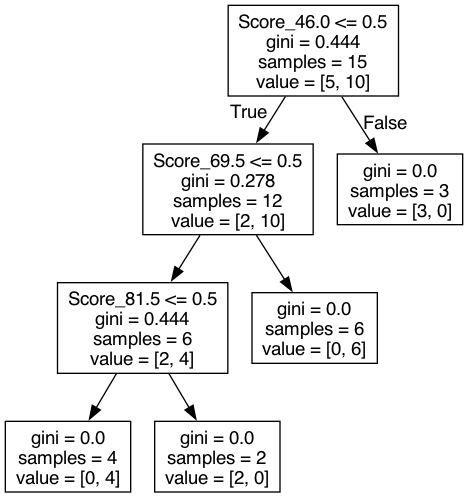

In [167]:
from sklearn.tree import export_graphviz
import os
# Export the decision tree to a .dot file
dot_data = export_graphviz(decisionTree, out_file="tree.dot", feature_names=X.columns)

# Install graphviz if not already available
# !pip install graphviz

# Render the .dot file into an image
os.system("dot -Tpng tree.dot -o tree.png")

# Display the generated image
from IPython.display import Image
Image(filename="tree.png", width=800, height=800)